During Lecture 4, we look at different synthesis methods for audio:

*   Additive synthesis (example of adding sinewaves together to obtain a square wave, check Lecture3_1.ipynb)
*   Amplitude modulation Lecture4_1.ipynb
*   (Frequency modulation)
*   Waveshaping Lecture4_2.ipynb


In addition, there are many other methods including granular, substractive, physical modelling etc.

In this example, we implement waveshaping and use conditionals and if-statements

Some reading material:

Waveshaper
http://sites.music.columbia.edu/cmc/MusicAndComputers/chapter4/04_06.php

Conditions and if statement
https://www.w3schools.com/python/python_conditions.asp

Here is an example of the tanh waveshaper in Csound
https://csoundjournal.com/ezine/winter1999/processing/index.html


In [ ]:
# In this code, we implement amplitude modulation

# Import libraries that contain some of the functions that we will need
import numpy as np
import soundfile as sf
from IPython.display import Audio, display
import matplotlib.pyplot as plt

# Here we declare the global variables
fs = 44100 # sampling rate in Hz

In [ ]:
def generate_sinewave(frequency, duration, sampling_rate):
  t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False) #good for creating decimal steps like 0.1
  wave = np.sin(2 * np.pi * frequency * t)
  return wave

In [ ]:
def play_wave(sig, sampling_rate, ap = False):
  audio = Audio._make_wav(sig,sampling_rate, 'normalize')
  display(Audio(audio, autoplay = ap)) # play audio

Now, let's also define a function for our waveshaper.  A very common equation for the waveshaper is the hyprbolic trangent
https://en.wikipedia.org/wiki/Hyperbolic_functions


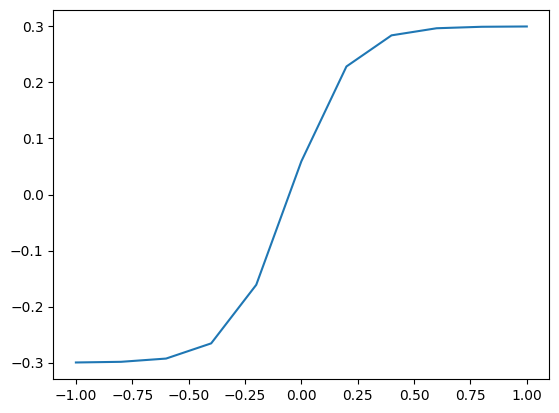

In [ ]:
def waveshaper(x,eq):
    x = np.array(x)
    if eq==1:
      wshaped = x**2
    elif eq==2:
      wshaped = x**3
    elif eq==3:
      wshaped = np.abs(x) - 0.3*x**3
    else:
      wshaped = 0.3*np.tanh(4*x+0.2)
    return wshaped

# This is just to plot our waveshaper
input = np.arange(-1,1.2,0.2) # good for creating integer steps like 1
output = waveshaper(input,3)
plt.plot(input, output)
plt.show()


Let's create a sinewave again and shape it


In [ ]:
sig = generate_sinewave(440,1,fs)
sig = 0.9 * sig

vsig = waveshaper(sig,3)

play_wave(sig,fs)
play_wave(vsig,fs)

Let's also plot the signals.

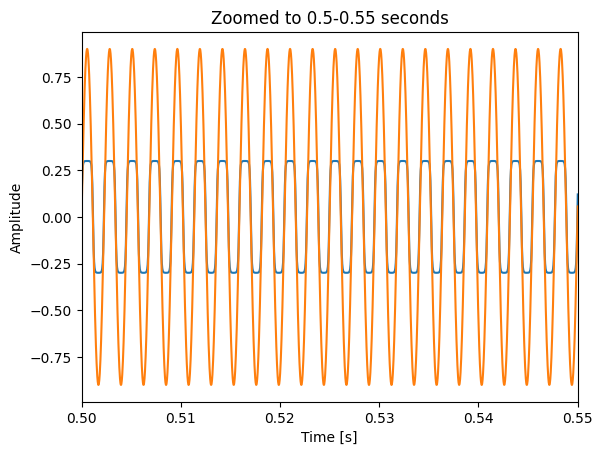

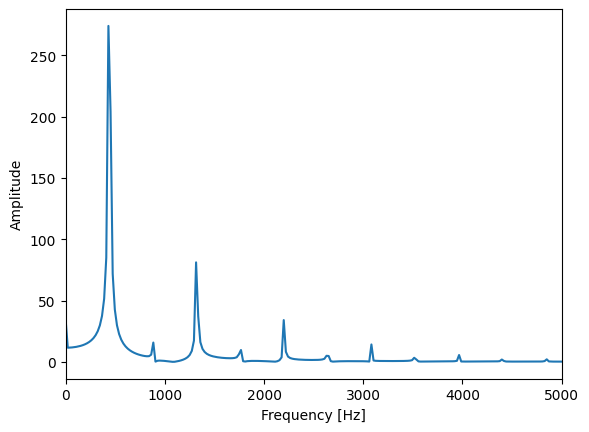

<Figure size 640x480 with 0 Axes>

In [ ]:
# this code is for plotting the figures
# no need to specifically understand, that is just how it is

plot_sig = vsig
dur = len(plot_sig) // fs
taxis = np.linspace(0, dur, int(dur * fs), endpoint=False)


# Plot in time
plt.figure()
plt.plot(taxis, plot_sig)
plt.plot(taxis, sig)
plt.title('Zoomed to 0.5-0.55 seconds')
plt.xlabel("Time [s]") # Set the label for x-axis
plt.ylabel("Amplitude") # Set the label for y-axis
plt.xlim(0.5, 0.55) # Change the time limit to see a few cycles of the sinewave
plt.show() #this comment is needed to draw the plot
plt.tight_layout()


# Plot in frequency
plot_sig = np.array(plot_sig)
N = 2048
output_fft = np.fft.fft(plot_sig,N)
output_spect = output_fft[0: int(N/2)]
freq_axis = np.linspace(0,fs/2,int(N/2))
plt.plot(freq_axis,np.abs(output_spect))
plt.xlim(0, 5000)
plt.xlabel("Frequency [Hz]") # Set the label for x-axis
plt.ylabel("Amplitude") # Set the label for y-axis
plt.show() #this comment is needed to draw the plot
plt.tight_layout()